## **Ex. No. 19 - TRAIN AND EVALUATE A LINEAR REGRESSION MODEL TO PREDICT PATIENT BLOOD PRESSURE**
---
Niranjana A

220301061

III BME - "A"

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart_failure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# @title
# Handle missing values (if any)
df = df.dropna()  # Remove rows with missing values

# Select features and target variable
X = df[["Age","Sex","FastingBS","MaxHR","RestingECG"]]
y = df["RestingBP"]
X = pd.get_dummies(X, columns=['Sex', 'RestingECG'], drop_first=True) # Assuming these are your categorical columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
var = explained_variance_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Variance:{var}")
print(f"R-squared: {r2}")

Mean Squared Error: 356.0105928218818
Variance:-0.0052727293229319905
R-squared: -0.03198058410324278


In [ ]:
print('model predictions: ')
print(y_pred[0:25])
print()
print('Actual values: ')
print(y_test[0:25])

model predictions: 
[135.08492052 131.94270713 141.58003623 135.61610129 131.87833699
 138.69590751 136.03419201 141.97302316 128.0294068  136.9519535
 134.7545763  139.36520042 136.80821475 132.39574045 136.59390918
 125.52976315 136.57129537 133.33047208 124.78863041 139.49085516
 141.00331908 128.70597206 124.70272214 135.91812351 142.73843659]

Actual values: 
668    140
30     145
377    160
535    130
807    108
793    125
363    120
583    142
165    140
483    120
773    120
551    120
768    130
694    120
718    165
312    125
713    140
309     95
846    118
616    115
355    145
39     150
231    130
822    105
603    155
Name: RestingBP, dtype: int64


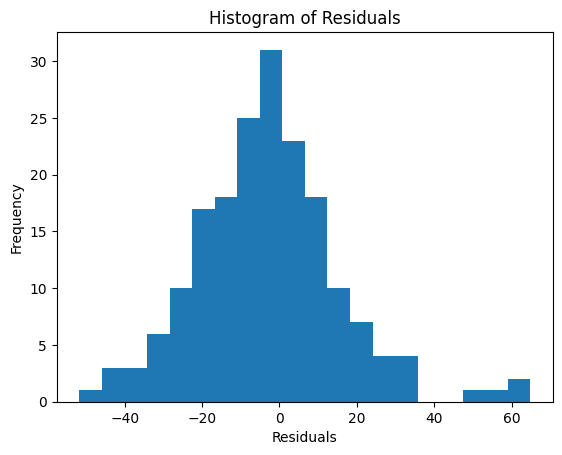

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
#Histogram of Residuals:

#This plot shows the distribution of the residuals.
#Ideal Pattern: A bell-shaped histogram centered around 0 indicates normally distributed errors.
#Interpretation: Skewness or multiple peaks in the histogram suggest non-normality.'''